In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tqdm.auto as tqdm

import itertools
from more_itertools import chunked
import numpy as np
import matplotlib.pyplot as plt

from modular_splicing.models_for_testing.main_models import AM, FM_full
from modular_splicing.models_for_testing.spliceai_models import spliceai_400, spliceai_10k
from modular_splicing.other_experiments.accuracy_by_sequence_position import (
    all_results_on_models,
    draw_results,
)

In [4]:
models = {
    "AM": AM.non_binarized_models(),
    "FM": FM_full.non_binarized_models(),
    "spliceai-400": spliceai_400,
    "spliceai-10k": spliceai_10k,
}

In [5]:
results = {k : all_results_on_models(v) for k, v in models.items()}

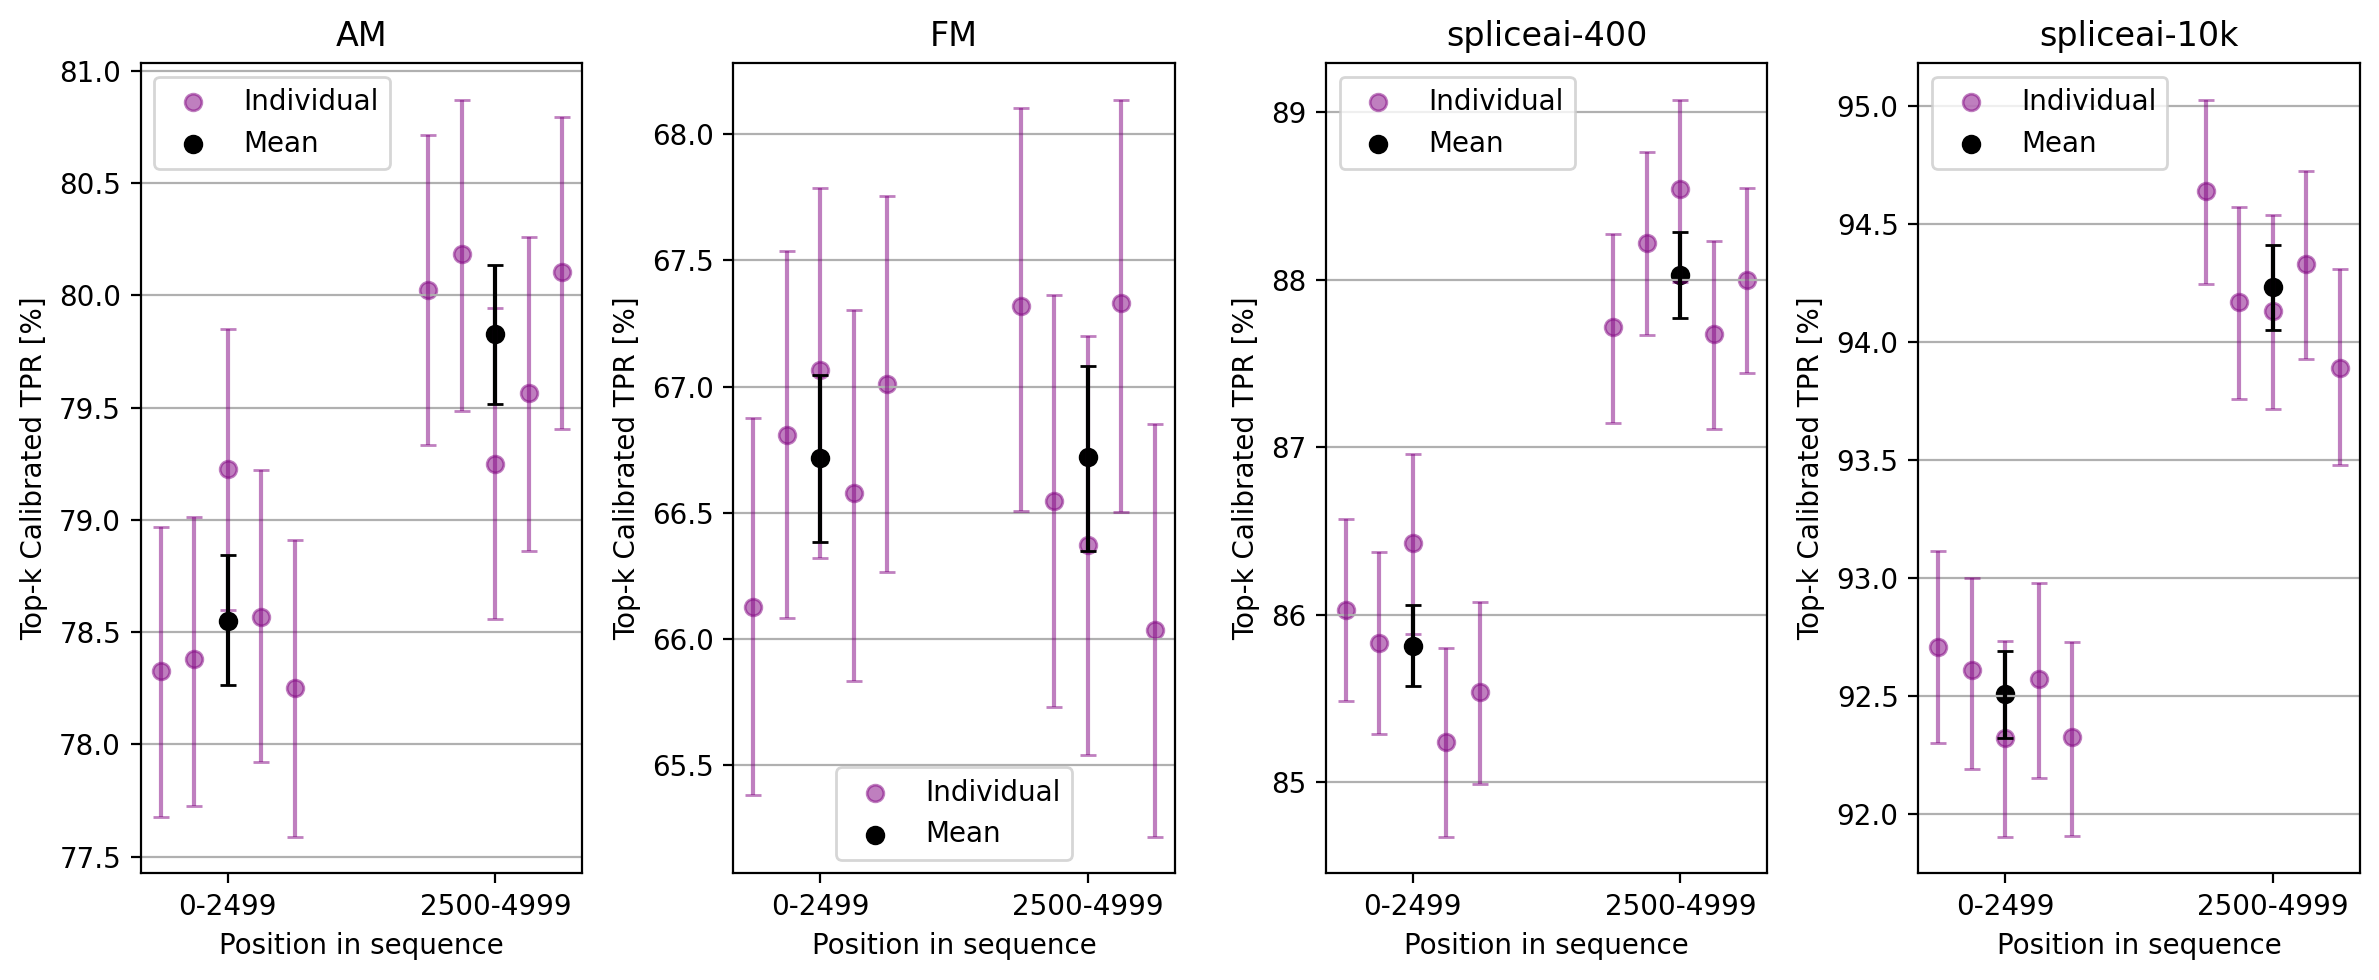

In [6]:
_, axs = plt.subplots(1, len(models), figsize=(len(models) * 3, 5), dpi=200, tight_layout=True)
for i, k in enumerate(results):
    draw_results(results[k], axs[i])
    axs[i].set_title(k)